## Objective
The objective is to build a classification model which can predict whether an account is becoming a Bad Debt. This prediction can help to forecast the number (and value) of accounts that are at risk of developing into a Bad Debt.


### Evaluation Criteria: Mean Precision Score

Mean of precision of all the classes = (P1+P2)/2  Here P1 is Precision of  Class 1 and P2 is Precision of Class2.


## Data Input:

There are two files:-
* account_train.csv - for training the model
* account_test.csv - for prediction and submission


## Data Dictionary:

* AccID: An unique id for the account
* CategoryID: An unique id for the category of the society
* Category: Category of society 
* Value: The market value of the particular property (account)
* PropertySize: The size of the property in square meters
* BillingAmt: The total amount payable by the resident to the society management
* AverageBillingAmt: The average amount payable by the resident to the society management
* CollectedAmt: The total amount collected from the resident 
* AverageCollectedAmt: The average amount collected from the resident 
* DebtAmt: The Total Debt that is at 90 days or more
* WriteOffAmt: The Total amount of debt that has been written off
* CollectionRatio: The ratio between the Total amount collected and Total Billing (ie. CollectedAmt/ BillingAmt)
* DebtBillingRatio: The ratio between the Total Debt and Total Billing (ie. (Total Debt + Total Write Off)/Total Billing)
* TotalElectricityBill: The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.
* HasID: The resident has an ID number. 
*  Label: 1 = Is considered to be a Bad Debt, 0 = Not considered to be a Bad Debt

## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 

### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn

In [1]:
# this will help in making the Python code more structured automatically
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


In [2]:
#TRAIN_DATA_URL = "https://raw.githubusercontent.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-june21-balanzer/main/src/projects/Hackathons/account_train_(1).csv?token=AFY32NURJVAI4HT37LK32QLBOJWUO"

#TEST_DATA_URL = "https://raw.githubusercontent.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-june21-balanzer/main/src/projects/Hackathons/account_test_(1).csv?token=AFY32NS2VSEOV3ZM4ESFKWTBOJWV2"
# reading  data given from bank and load to data frame
#debt = pd.read_csv(TRAIN_DATA_URL)
#debt_test = pd.read_csv(TEST_DATA_URL)
#debt = pd.read_csv("account_train_(1).csv")


from google.colab import files
uploaded = files.upload()


import io
debt = pd.read_csv(io.BytesIO(uploaded['account_train_(1).csv']))
debt_test = pd.read_csv(io.BytesIO(uploaded['account_test_(1).csv']))


# copying orignal data so that when changing data we dont lose original
data = debt.copy()
data_validation = debt_test.copy()




ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# copying orignal data so that when changing data we dont lose original
data = debt.copy()
data_validation = debt_test.copy()

In [ ]:
print(f'data(train) shape after reading csv :  {data.shape}')
print(f'data_validation(test) shape after reading csv :  {data_validation.shape}')

data(train) shape after reading csv :  (100476, 16)
data_validation(test) shape after reading csv :  (33493, 15)


In [ ]:
data.head(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0


In [ ]:
data_validation.tail(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
33488,eb61949a-70b3-46db-b978-9e20f0d8919d,1,Residential,49000,239,266,4,416,46,0,0,1.57,0.00,0,1
33489,6d2d00c3-dbd7-49a7-abc8-b1635af2cc32,1,Residential,21710,322,4475,79,3630,81,3,0,0.81,0.00,703,1
33490,f9ab20e9-5803-46c5-b41e-bed6fda06773,6,Government,83300,316,492,246,492,492,0,0,1.00,0.00,0,0
33491,fedb8241-a9fb-48dd-adfa-b874e0da7ac5,1,Residential,61560,377,350,15,0,0,1047,0,0.00,3.00,0,1
33492,3d97a35c-9a78-414c-9a62-35d60d38ad67,1,Residential,2020000,971,22172,1232,23500,23500,519,0,1.06,0.02,0,0


In [ ]:
data.shape

(100476, 16)

In [ ]:
data_validation.shape

(33493, 15)

In [ ]:
"""
## Replacing 0 with Nan for columns should not have 0 values. 
cols_cannot_have_zero = ['Value','PropertySize']
data[cols_cannot_have_zero] = data[cols_cannot_have_zero].replace(0, np.nan)
data_validation[cols_cannot_have_zero] = data_validation[cols_cannot_have_zero].replace(0, np.nan)
"""

"\n## Replacing 0 with Nan for columns should not have 0 values. \ncols_cannot_have_zero = ['Value','PropertySize']\ndata[cols_cannot_have_zero] = data[cols_cannot_have_zero].replace(0, np.nan)\ndata_validation[cols_cannot_have_zero] = data_validation[cols_cannot_have_zero].replace(0, np.nan)\n"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

In [ ]:
data_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccID                 33493 non-null  object 
 1   CategoryID            33493 non-null  int64  
 2   Category              33493 non-null  object 
 3   Value                 33493 non-null  int64  
 4   PropertySize          33493 non-null  int64  
 5   BillingAmt            33493 non-null  int64  
 6   AverageBillingAmt     33493 non-null  int64  
 7   CollectedAmt          33493 non-null  int64  
 8   AverageCollectedAmt   33493 non-null  int64  
 9   DebtAmt               33493 non-null  int64  
 10  WriteOffAmt           33493 non-null  int64  
 11  CollectionRatio       33493 non-null  float64
 12  DebtBillingRatio      33493 non-null  float64
 13  TotalElectricityBill  33493 non-null  int64  
 14  HasID                 33493 non-null  int64  
dtypes: float64(2), int6

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,2.245511,2.730572e+00,1.0,1.0,1.0,2.00,13.0
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.0,0.5,1.00,1701912.0


In [ ]:
data_validation.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,33493.0,2.233661,2.728670e+00,1.0,1.0,1.00,2.00,12.0
Value,33493.0,687551.762727,2.151611e+06,0.0,35000.0,91400.00,745000.00,113000000.0
PropertySize,33493.0,760490.236049,6.452697e+06,0.0,275.0,503.00,1162.00,444637539.0
BillingAmt,33493.0,11679.918490,1.479712e+05,-293153.0,457.0,3164.00,8773.00,15853577.0
AverageBillingAmt,33493.0,541.835996,4.376324e+03,-21737.0,23.0,106.00,283.00,368688.0
CollectedAmt,33493.0,9794.642672,1.091680e+05,-19696.0,0.0,400.00,7394.00,15797085.0
AverageCollectedAmt,33493.0,1844.584719,1.600349e+04,-19696.0,0.0,100.00,780.00,953582.0
DebtAmt,33493.0,10317.504673,1.105596e+05,0.0,0.0,0.00,2361.00,13091344.0
WriteOffAmt,33493.0,553.809781,4.584730e+03,0.0,0.0,0.00,0.00,178605.0
CollectionRatio,33493.0,-2.268585,7.228208e+02,-105665.0,0.0,0.52,1.00,30850.0


In [ ]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )

print_null_info(data)


,missing count,missing %


In [ ]:
print_null_info(data_validation)

,missing count,missing %


In [ ]:
# check for any duplciate data
data[data.duplicated()].shape

(0, 16)

In [ ]:
## Replace NAN with median values 

# counting the number of missing values per row

num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()


0    100476
dtype: int64

In [ ]:
#data[num_missing == 2].sample(n=15)

In [ ]:
#data[num_missing == 1].sample(n=15)

In [ ]:
# Checking Value grouped by Category, PropertySize
#data.groupby(["Category"])["Value"].median()

In [ ]:
# To impute missing values
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)

In [ ]:

"""
reqd_col_for_impute=['Value','PropertySize']

# Fit and transform the train data
data[reqd_col_for_impute] = imputer.fit_transform(data[reqd_col_for_impute])


# Transform the test data
data_validation[reqd_col_for_impute] = imputer.transform(data_validation[reqd_col_for_impute])

"""

"\nreqd_col_for_impute=['Value','PropertySize']\n\n# Fit and transform the train data\ndata[reqd_col_for_impute] = imputer.fit_transform(data[reqd_col_for_impute])\n\n\n# Transform the test data\ndata_validation[reqd_col_for_impute] = imputer.transform(data_validation[reqd_col_for_impute])\n\n"

In [ ]:
print_null_info(data)

,missing count,missing %


In [ ]:
print_null_info(data_validation)

,missing count,missing %


In [ ]:
#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
            print()
            print(f"Column name : ({col}), Column Data Type : ({df[col].dtypes}) and has total : ({df[col].nunique()}) unique values")
            print()
            print(f"Top 10 Unique Values & Value counts ")
            print()
            print(df[col].value_counts()[0:10])
            print()
            print("-" * 50)


In [ ]:
# print value types and value counts

cols = ["AccID", "CategoryID", "Category", "HasID"]

print_category_value_counts(data, cols)
print_category_value_counts(data_validation, cols)



Column name : (AccID), Column Data Type : (object) and has total : (100476) unique values

Top 10 Unique Values & Value counts 

e654f5df-4661-4440-8eaf-fae0c2a2e371    1
1d27348a-d7e7-4ddb-898c-cd4fe4bf7578    1
d2e9f3b6-61ca-4300-beb5-78a2d9bfca58    1
5cdc3344-425b-4949-ad18-269dae7384b3    1
1bca25df-0952-4b6f-8403-63e28e997658    1
3151e8f8-51f3-4762-8f28-50d1d14a25d6    1
8d8cb3ed-ac70-498f-9945-65105fa5d733    1
9244147e-9ea2-4cb8-8d3d-3380b6864a26    1
111acd8b-8d98-462a-a7ee-02563fab45f6    1
d9eeaadb-8824-4370-8850-c34dcee12bd2    1
Name: AccID, dtype: int64

--------------------------------------------------

Column name : (CategoryID), Column Data Type : (int64) and has total : (12) unique values

Top 10 Unique Values & Value counts 

1     74339
4      7559
11     6642
2      5871
6      2878
5      2198
7       388
12      335
3       181
8        69
Name: CategoryID, dtype: int64

--------------------------------------------------

Column name : (Category), Column Data

In [ ]:
# Drop CategoryID, AccID Columns - we can use Category in future
data.drop(["CategoryID", "AccID"], axis=1, inplace=True)
data_validation.drop(["CategoryID", "AccID"], axis=1, inplace=True)

In [ ]:
# create a list those columns should be converted as category
cat_vars = ["Category"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")
    data_validation[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Category              100476 non-null  category
 1   Value                 100476 non-null  int64   
 2   PropertySize          100476 non-null  int64   
 3   BillingAmt            100476 non-null  int64   
 4   AverageBillingAmt     100476 non-null  int64   
 5   CollectedAmt          100476 non-null  int64   
 6   AverageCollectedAmt   100476 non-null  int64   
 7   DebtAmt               100476 non-null  int64   
 8   WriteOffAmt           100476 non-null  int64   
 9   CollectionRatio       100476 non-null  float64 
 10  DebtBillingRatio      100476 non-null  float64 
 11  TotalElectricityBill  100476 non-null  int64   
 12  HasID                 100476 non-null  int64   
 13  Label                 100476 non-null  int64   
dtypes: category(1), float64(2), int64(11

# Exploratory Data **Analysis**

In [ ]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=25)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

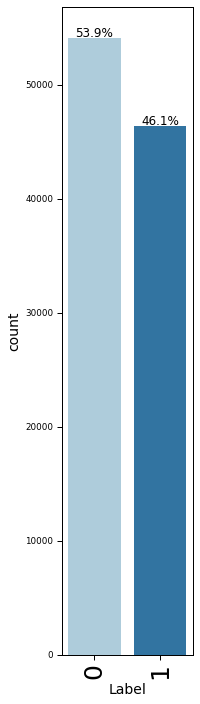

In [ ]:
labeled_barplot(data=data, feature="Label", perc=True)



## Identify Correlation in data 

lets check how the target feature related with other features and relationship between features

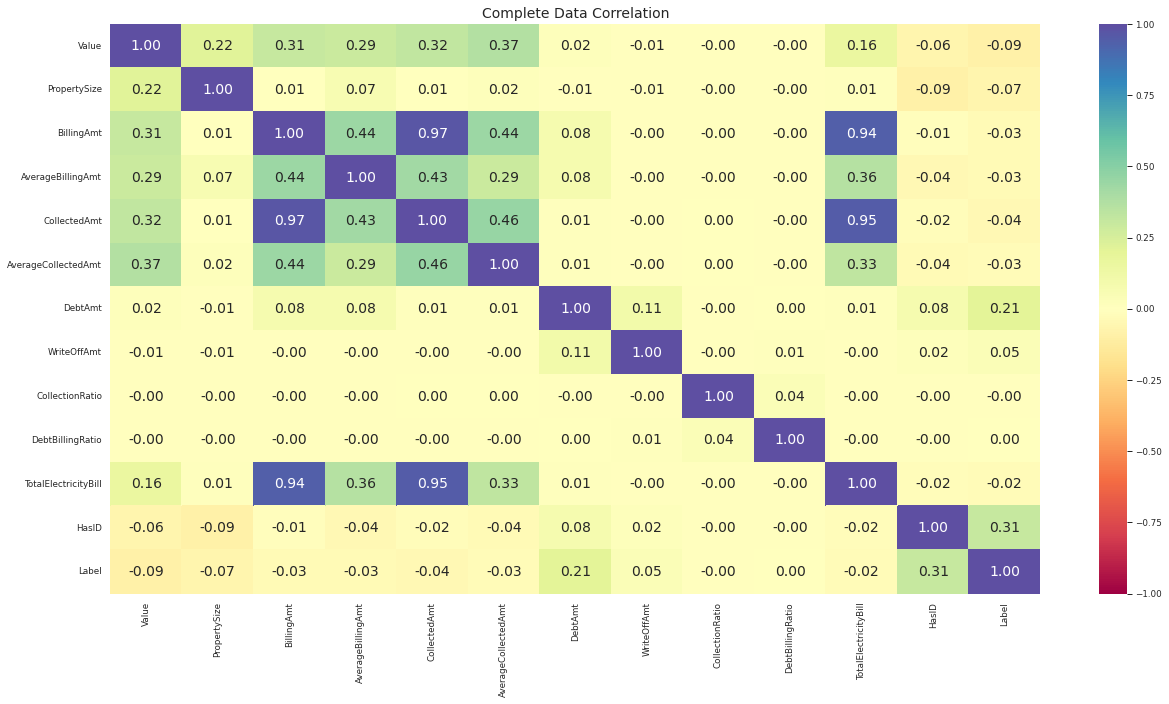

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data.sample(10), palette="magma")

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdfbecef950> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdfbecf5440> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
thorow error to stop process

SyntaxError: ignored

In [ ]:
data['Pending_amount']=data['BillingAmt']-data['CollectedAmt'];
data_validation['Pending_amount']=data_validation['BillingAmt']-data_validation['CollectedAmt'];

X shape before one hot encoding (100476, 11)
XV shape before one hot encoding (33493, 11)


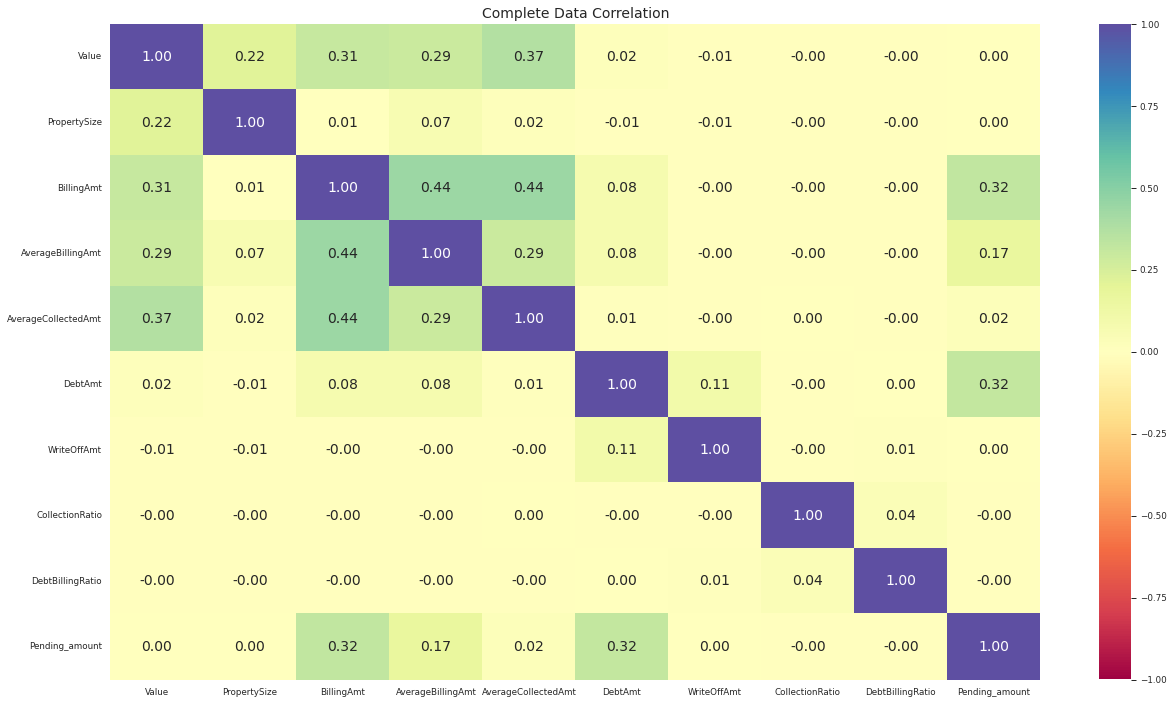

X shape after one hot encoding (100476, 21)
XV shape after one hot encoding (33493, 21)


In [ ]:
"""
X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()
"""
"""
X = data.drop(["Label","HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
"""

X = data.drop(["Label","HasID","TotalElectricityBill","CollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","TotalElectricityBill","CollectedAmt"], axis=1)

"""
X = data.drop(["Label","TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
"""


print(f'X shape before one hot encoding {X.shape}')
print(f'XV shape before one hot encoding {XV.shape}')


plt.figure(figsize=(18, 10))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
XV = pd.get_dummies(XV, drop_first=True)
print(f'X shape after one hot encoding {X.shape}')
print(f'XV shape after one hot encoding {XV.shape}')

### Check the data types of the columns in X variable after get_dummies
##### Understand the shape of the dataset.

In [ ]:
# import train_test_split library

from sklearn.model_selection import train_test_split

In [ ]:
# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)


Number of rows in train data = 70333
Number of rows in test data = 30143

Percentage of classes in training set
0    53.730112
1    46.269888
Name: Label, dtype: float64

Percentage of classes in test set
0    54.155194
1    45.844806
Name: Label, dtype: float64


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    print(f"Model '{name}' performance \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Test",
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf


In [ ]:
def confusion_matrix_classification(name, model):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = X_train
    target_train = y_train

    predictors_test = X_test
    target_test = y_test
    predictors_output = X_test.copy()

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    predictors_output['Orig'] = target_test
    predictors_output['Model'] = y_pred_test

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True label", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True label", ylabel="Predicted label", title="Test Data")


    ret_elements = predictors_output[predictors_output["Orig"] != predictors_output["Model"]];
    return ret_elements



# Model building - Logistic Regression

In [ ]:
# import libraries
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To build model for prediction
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
# using newton-cg solver since its faster for high-dimensional data
model1 = LogisticRegression(solver="newton-cg", random_state=1)
lg1 = model1.fit(X_train, y_train)

In [ ]:
lg1_model_perf = model_performance_classification("Default Logistic Regression", lg1)
lg1_model_perf

Model 'Default Logistic Regression' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Logistic Regression,Training,64.502,64.822,67.607,65.145,67.391
1,Default Logistic Regression,Test,63.818,64.304,67.518,64.798,67.234


Model 'Default Logistic Regression' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,DebtBillingRatio,HasID,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model
95488,240000,0,1404,1404,2.36,0,0,0,0,0,0,0,0,0,0,1,0,1,0
39505,881160,0,30167,503,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,1
31385,156000,376,-12,0,-11.76,0,0,0,0,0,0,0,0,0,0,1,0,1,0
64659,230000,0,7210,150,0.84,0,0,0,0,0,0,0,0,0,0,1,0,1,0
45545,1400000,696,27892,372,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,1
45794,3700000,20265143,7279,280,0.01,1,0,0,0,0,0,0,0,0,0,0,0,1,0
34794,81000,242,-21,-1,-1.94,0,0,0,0,0,0,0,0,0,0,1,0,1,0
40164,40000,606,-384,-8,-1.00,0,0,0,0,0,0,0,0,0,0,1,0,1,0
17164,498960,840,3784,172,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,1
49097,175000,296,1007,12,0.29,0,0,0,0,0,0,0,0,0,0,1,0,1,0


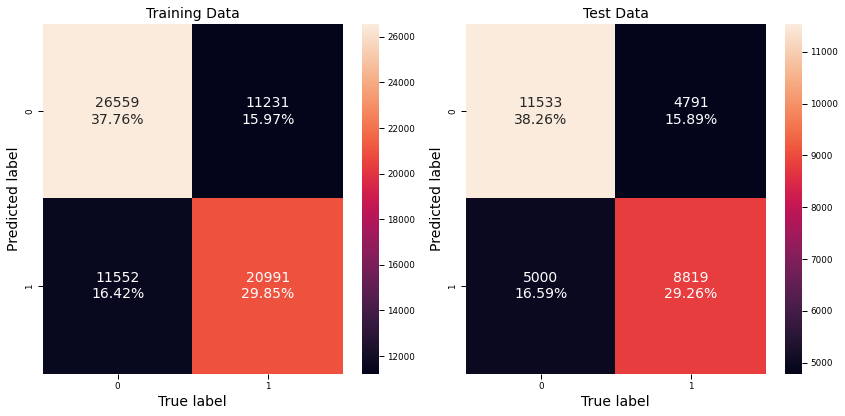

In [ ]:
ret_vals = confusion_matrix_classification("Default Logistic Regression", lg1)
ret_vals.sample(30)

In [ ]:
ret_vals.sample(30)

,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,HasID,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model
61735,960000,22166,7371,3686,3767,43,0,1.02,0.01,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7019,0,0,-312,-6,5,0,0,-0.05,0.00,1,0,0,0,0,0,0,0,0,0,0,1,0,1
9493,4300000,776,-26,-9,0,26,0,0.00,-0.98,1,0,0,0,0,0,0,0,0,0,1,0,1,0
15865,710000,942,-15797,-416,0,0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,1
86814,3331000,15936275,923,32,626,26,0,2.03,0.03,1,0,0,0,0,0,0,0,0,0,0,0,1,0
91974,1281400,2322367,1664,69,1650,14,0,0.99,0.01,0,0,0,0,0,0,0,0,0,0,0,0,1,0
70045,240000,463222,1028,79,523,9,0,1.02,0.01,0,0,0,0,0,0,0,0,0,0,0,0,1,0
82583,240000,685642,1028,79,527,9,0,1.03,0.01,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50713,1780100,685,0,0,0,11,0,0.00,31.39,0,0,0,0,0,0,0,0,0,0,1,0,1,0
85086,900000,1166,34595,474,478,10,0,1.08,0.00,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1)
modelDM1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
dec_tree_model_perf = model_performance_classification("Default Decision Tree Classifier", modelDM1)
dec_tree_model_perf

Model 'Default Decision Tree Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Decision Tree Classifier,Training,99.939,99.969,99.972,100.000,99.969
1,Default Decision Tree Classifier,Test,98.024,97.862,98.036,97.699,98.035


In [ ]:
create_validation_output(modelDM1,'default_tree_output.csv')

generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    53.267847
1    46.732153
Name: Label, dtype: float64



Model 'Default Decision Tree Classifier' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,DebtBillingRatio,HasID,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model
97223,34000,296,6032,128,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
62184,1100000,1132,16657,320,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
45290,640000,830929,1280,98,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39009,2000000,1079,34395,459,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
85733,55000,205,211,3,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97046,770000,599,1705,155,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
28261,345400,643,8653,309,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
60684,1100000,2666212,2200,2200,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35028,26640,289,157,3,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


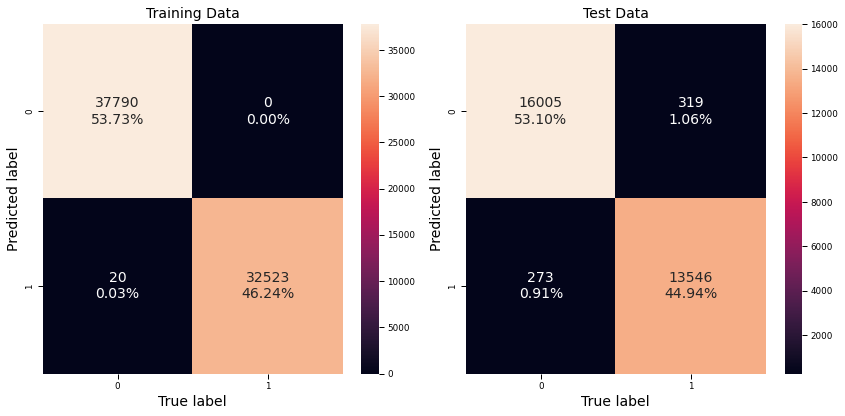

In [ ]:
confusion_matrix_classification("Default Decision Tree Classifier", modelDM1)

### Creating Functions to create output files

In [ ]:
## Generate Validation output 

def create_validation_output(model,output_file_name):
    print("generate output")
    print()
    debt_test['Label'] = model.predict(XV)
    debt_test[["AccID","Label"]].to_csv(output_file_name,index=False)
    from google.colab import files
    files.download(output_file_name)
    print( debt_test['Label'].value_counts(normalize=True) * 100)
    print()
    

In [ ]:
#create_validation_output(rf,'default_random_forest_output.csv')

In [ ]:
#create_validation_output(estimator,'tuned_dtree_output.csv')

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.46, 1: 0.54})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15,20,25, 30,50,None],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


# Type of scoring used to compare parameter combinations
#scorer = make_scorer(f1_score)
scorer = make_scorer(precision_score)
#scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.46, 1: 0.54},
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=1e-05,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [ ]:
dec_tree_tuned_model_perf = model_performance_classification("Tuned Decision Tree Classifier", estimator)
dec_tree_tuned_model_perf

Model 'Tuned Decision Tree Classifier' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Decision Tree Classifier,Training,97.843,98.910,99.002,100.0,98.921
1,Tuned Decision Tree Classifier,Test,97.894,98.936,99.035,100.0,98.947


In [ ]:
confusion_matrix_classification("Tuned Decision Tree Classifier", estimator)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.46,1:0.54},random_state=1),random_state=1)
bagging_wt.fit(X_train, y_train)




In [ ]:
bagging_model_wt_perf = model_performance_classification(
    "Bagging Classifier WT Decision Tree", bagging_wt
)
bagging_model_wt_perf

In [ ]:
confusion_matrix_classification("Bagging Classifier WT Decision Tree", bagging_wt)

In [ ]:
create_validation_output(bagging_wt,'default_bagging_wt_output.csv')

In [ ]:
create_validation_output(estimator,'tuned_dtree_output.csv')

### Regularization

In [ ]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="f1", n_jobs=8)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train, y_train)

In [ ]:
lr_estimator_perf = model_performance_classification(
    "LogisticRegression Regularization", lr_estimator
)
lr_estimator_perf

In [ ]:
confusion_matrix_classification("LogisticRegression Regularization", lr_estimator
)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Create a regularized RIDGE model and note the coefficients

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

In [ ]:
# Create a regularized LASSO model and note the coefficients

In [ ]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train,y_train)

print ("Lasso model:", (log.coef_))

In [ ]:
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

In [ ]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

In [ ]:
xgb_classifier_pref = model_performance_classification(
    "Default XGBoost Boosting", xgb_classifier
)
xgb_classifier_pref

In [ ]:
confusion_matrix_classification("Default XGBoost Boosting", xgb_classifier)

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)


# Grid of parameters to choose from
parameters = {'max_samples': [0.5,0.6,0.7,0.8,0.9,1], 
              'max_features': [0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators' : [10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
#acc_scorer = metrics.make_scorer(metrics.f1_score)
# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=8)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

bagging_estimator_pref = model_performance_classification(
    "Tuned Bagging Classifier", bagging_estimator_tuned
)
bagging_estimator_pref


In [ ]:
confusion_matrix_classification("Tuned Bagging Classifier", bagging_estimator_tuned)

In [ ]:
create_validation_output(bagging_estimator_tuned,'tuned_bagging_output.csv')

**Tuning Random Forest**

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.45,1:0.55},random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [10],
        "min_samples_leaf": np.arange(5, 100, 20),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
        "min_impurity_decrease": [0.001, 0.01, 0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=8)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)


rf_estimator_pref = model_performance_classification(
    "Tuned Random Forest", rf_estimator
)
rf_estimator_pref


Model 'Tuned Random Forest' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Random Forest,Training,99.447,99.723,99.745,100.0,99.723
1,Tuned Random Forest,Test,99.776,99.888,99.900,100.0,99.888


Model 'Tuned Random Forest' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,Pending_amount,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model
91537,101000,498,509,9,0,0,2,0.0,0.0,509,0,0,0,0,0,0,0,0,0,1,0,1,0


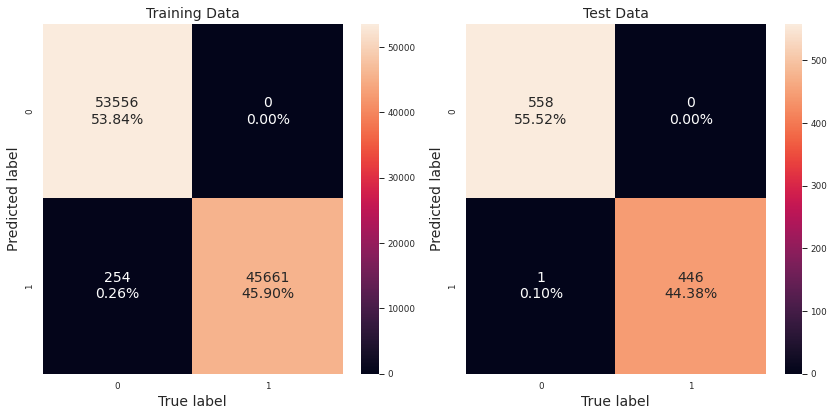

In [ ]:
confusion_matrix_classification ("Tuned Random Forest", rf_estimator
)

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')


# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=1, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
"""
X = data.drop(["Label","TotalElectricityBill","CollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["TotalElectricityBill","CollectedAmt"], axis=1)
"""

X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()

print(f'X shape before one hot encoding {X.shape}')
print(f'XV shape before one hot encoding {XV.shape}')

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
XV = pd.get_dummies(XV, drop_first=True)
print(f'X shape after one hot encoding {X.shape}')
print(f'XV shape after one hot encoding {XV.shape}')

In [ ]:
# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)

"""

In [ ]:
cols_to_transform = ["Value","PropertySize","BillingAmt","AverageBillingAmt","CollectedAmt","AverageCollectedAmt","DebtAmt","WriteOffAmt","CollectionRatio","DebtBillingRatio","TotalElectricityBill"]
std_scaler = StandardScaler()

for colname in cols_to_transform:
   """
    plt.hist(data[colname], bins=50)
    plt.title(colname + " without transform")
    plt.show()
    plt.hist(std_scaler.fit_transform(data[[colname]]), 50)
    plt.title(colname + " with transform")
    plt.show()
   """
   X[colname+'_z_std'] = std_scaler.fit_transform(X[[colname]])
   XV[colname+'_z_std'] = std_scaler.fit_transform(XV[[colname]])

In [ ]:
X.drop(cols_to_transform, axis=1, inplace=True)
XV.drop(cols_to_transform, axis=1, inplace=True)

In [ ]:
X.sample(10)

In [ ]:
XV.sample(10)

In [ ]:
# import train_test_split library

from sklearn.model_selection import train_test_split



# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)




In [ ]:
#import DecisionTree & GridSearchCV

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)


In [ ]:
modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1)
modelDM1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Model 'Default Dtree' confusion matrix 


Model 'Default Dtree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Default Dtree,Training,99.994,99.997,99.997,100.00,99.997
1,Default Dtree,Test,99.537,99.533,99.572,99.53,99.569


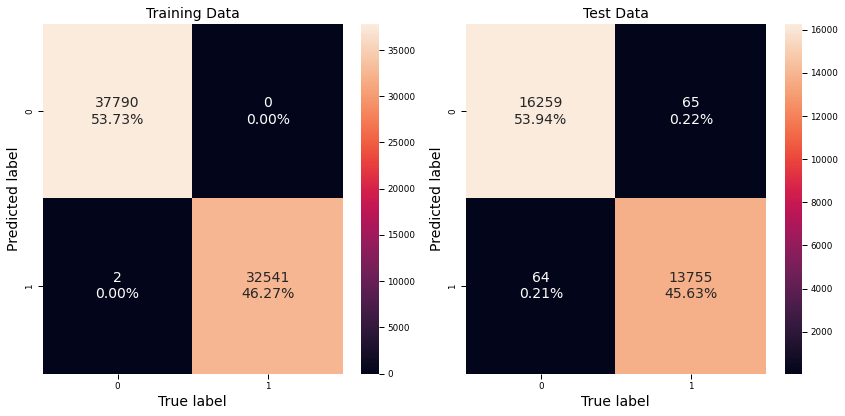

In [ ]:
confusion_matrix_classification("Default Dtree", modelDM1)
modelDM1_pref = model_performance_classification(
    "Default Dtree", modelDM1
)
modelDM1_pref

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.46,1:0.54})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15,20,25,50,75,100,150,200, None],
    "criterion": ["gini"],
    "splitter": ["best"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)
#scorer = make_scorer(precision_score)
#scorer = make_scorer(recall_score)
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.46, 1: 0.54},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [ ]:

estimator_pref = model_performance_classification(
    "Tuned Dtree", estimator
)
estimator_pref

Model 'Tuned Dtree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Tuned Dtree,Training,99.503,99.751,99.771,100.0,99.752
1,Tuned Dtree,Test,100.000,100.000,100.000,100.0,100.000


Model 'Tuned Dtree' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,Pending_amount,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model


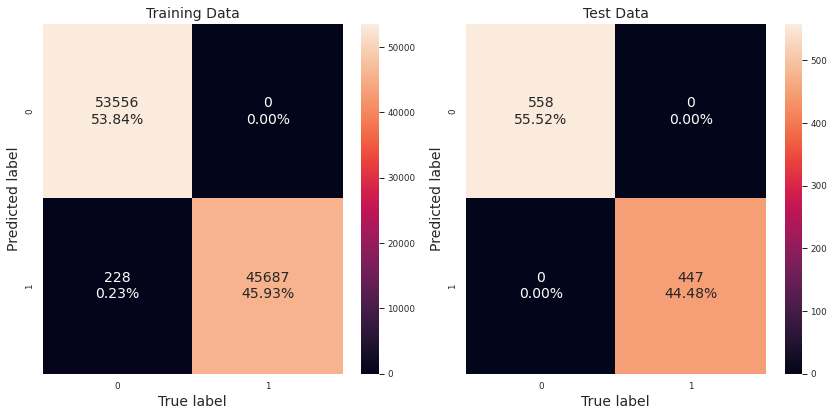

In [ ]:
confusion_matrix_classification("Tuned Dtree", estimator)


In [ ]:
create_validation_output(estimator,'dtree_tuned_output.csv')

generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    54.0501
1    45.9499
Name: Label, dtype: float64



In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.44,1:0.56},random_state=1),random_state=1)
bagging_wt.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.44,
                                                                      1: 0.56},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

In [ ]:
bagging_model_wt_perf = model_performance_classification(
    "Bagging Classifier WT Decision Tree", bagging_wt
)
bagging_model_wt_perf

Model 'Bagging Classifier WT Decision Tree' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Bagging Classifier WT Decision Tree,Training,99.849,99.922,99.927,99.994,99.922
1,Bagging Classifier WT Decision Tree,Test,99.515,99.746,99.768,99.978,99.748


Model 'Bagging Classifier WT Decision Tree' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,HasID,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model
15560,4632000,1410952,2441,163,2485,0,0,2.04,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
38151,60000,216,102,1,50,0,0,7.28,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
82988,60000,220,545,7,97,0,0,2.68,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
79234,450000,731,8261,76,625,0,0,0.83,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
25736,45000,265,1997,14,163,0,0,0.98,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
42119,0,0,7478,208,7478,0,0,1.00,0.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
65311,1988000,10728883,1187,79,1209,0,0,2.04,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5968,3700000,938,22994,22994,22994,0,0,1.00,0.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
98429,0,0,3003,231,151,0,0,0.75,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6625,1300000,576,8018,8018,8018,0,0,1.00,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


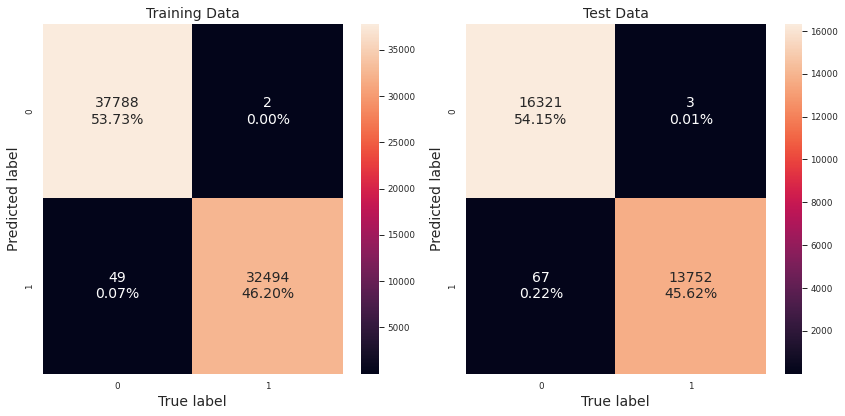

In [ ]:
confusion_matrix_classification("Bagging Classifier WT Decision Tree", bagging_wt)

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.46,1:0.54}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.46, 1: 0.54}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [ ]:
rf_model_wt_pref = model_performance_classification("Random Forest with wt", rf_wt)
rf_model_wt_pref

Model 'Random Forest with wt' performance 




,Model,Data,Recall,F1-Score,Accuracy,Precision,ROC-AUC
0,Random Forest with wt,Training,99.998,99.997,99.997,99.996,99.997
1,Random Forest with wt,Test,100.000,100.000,100.000,100.000,100.000


Model 'Random Forest with wt' confusion matrix 




,Value,PropertySize,BillingAmt,AverageBillingAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,Pending_amount,Category_Business,Category_Educational,Category_Environmental Management,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown,Orig,Model


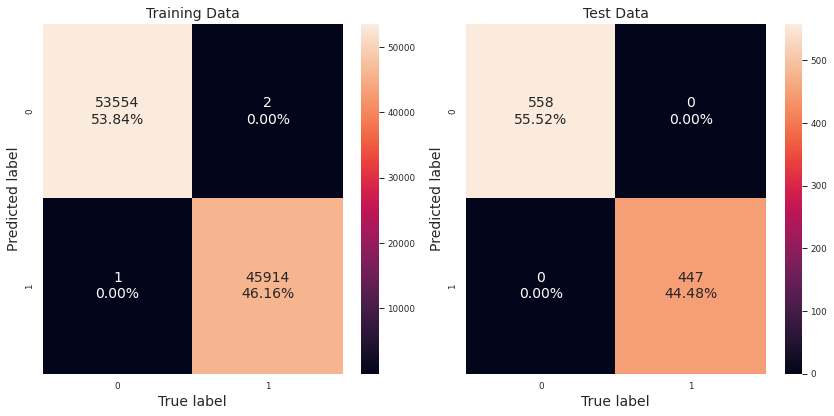

In [ ]:
confusion_matrix_classification("Random Forest with wt", rf_wt)


In [ ]:
data[(data["DebtAmt"]<=0) & (data["WriteOffAmt"]<=0) & (data["Label"]>=1) ].sample(50)

,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label,Pending_amount
93469,Agricultural,2000000,636857,4000,4000,4000,4000,0,0,1.00,0.00,0,0,1,0
62357,Agricultural,1000,0,0,0,0,0,0,0,0.00,1.00,0,0,1,0
75768,Residential,54000,299,993,16,762,63,0,0,0.77,0.00,0,1,1,231
75137,Residential,170000,600,8387,171,8441,1407,0,0,1.01,0.00,3132,1,1,-54
51124,Residential,67000,263,475,8,607,32,0,0,1.28,0.00,0,1,1,-132
37476,Agricultural,3171000,32637675,1539,128,3107,777,0,0,2.02,0.00,0,0,1,-1568
17536,Residential,1971800,722,16261,194,16208,8104,0,0,1.00,0.00,0,1,1,53
68049,Residential,21060,245,12,1,24,24,0,0,2.08,0.01,0,1,1,-12
14883,Municipal,55000,276,3611,56,4507,133,0,0,1.25,0.00,0,1,1,-896
43977,Educational,3850000,21103,135866,5661,107826,26957,0,0,0.79,0.00,0,0,1,28040


In [ ]:
"""
X = data.drop(["Label"], axis=1)
Y = data["Label"]
XV =  data_validation.copy()
"""
"""
X = data.drop(["Label","HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","CollectionRatio","DebtBillingRatio","TotalElectricityBill","CollectedAmt","AverageBillingAmt","AverageCollectedAmt"], axis=1)
"""

X = data.drop(["Label","HasID","TotalElectricityBill","CollectedAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["HasID","TotalElectricityBill","CollectedAmt"], axis=1)

"""
X = data.drop(["Label","TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
Y = data["Label"]
XV =  data_validation.drop(["TotalElectricityBill","CollectedAmt","AverageCollectedAmt","CollectionRatio","DebtAmt"], axis=1)
"""


print(f'X shape before one hot encoding {X.shape}')
print(f'XV shape before one hot encoding {XV.shape}')

"""
plt.figure(figsize=(18, 10))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()
"""

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
XV = pd.get_dummies(XV, drop_first=True)
print(f'X shape after one hot encoding {X.shape}')
print(f'XV shape after one hot encoding {XV.shape}')



# splitting in training and test set
"""
X_train, X_test, y_train, y_test = train_test_split(
    X.head(10000), Y.head(10000), test_size=0.3, random_state=101
)
"""
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.01, random_state=101
)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print()
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)

"""
rf_wt = RandomForestClassifier(class_weight={0:0.56,1:0.44}, random_state=1)
rf_wt.fit(X_train, y_train)


rf_model_wt_pref = model_performance_classification("Random Forest with wt", rf_wt)
rf_model_wt_pref

confusion_matrix_classification("Random Forest with wt", rf_wt)
"""

X shape before one hot encoding (100476, 11)
XV shape before one hot encoding (33493, 11)
X shape after one hot encoding (100476, 21)
XV shape after one hot encoding (33493, 21)
Number of rows in train data = 99471
Number of rows in test data = 1005

Percentage of classes in training set
0    53.840818
1    46.159182
Name: Label, dtype: float64

Percentage of classes in test set
0    55.522388
1    44.477612
Name: Label, dtype: float64


'\nrf_wt = RandomForestClassifier(class_weight={0:0.56,1:0.44}, random_state=1)\nrf_wt.fit(X_train, y_train)\n\n\nrf_model_wt_pref = model_performance_classification("Random Forest with wt", rf_wt)\nrf_model_wt_pref\n\nconfusion_matrix_classification("Random Forest with wt", rf_wt)\n'

In [ ]:
create_validation_output(rf_wt,'rf_wt_tuned_output.csv')

generate output



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    54.053086
1    45.946914
Name: Label, dtype: float64

